In [51]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
data=yf.download("AAPL", start="2020-01-01", end="2024-12-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200


In [5]:
data.to_csv("AAPL2020-2024.csv")

In [6]:
data=pd.read_csv("AAPL2020-2024.csv", header=[0,1], index_col=[0])

In [7]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700


In [8]:
data.reset_index(inplace=True)

In [9]:
data["Date"] = pd.to_datetime(data["Date"])  

In [10]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
1,2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800
2,2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
3,2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
4,2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200
...,...,...,...,...,...,...
1252,2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
1253,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
1254,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

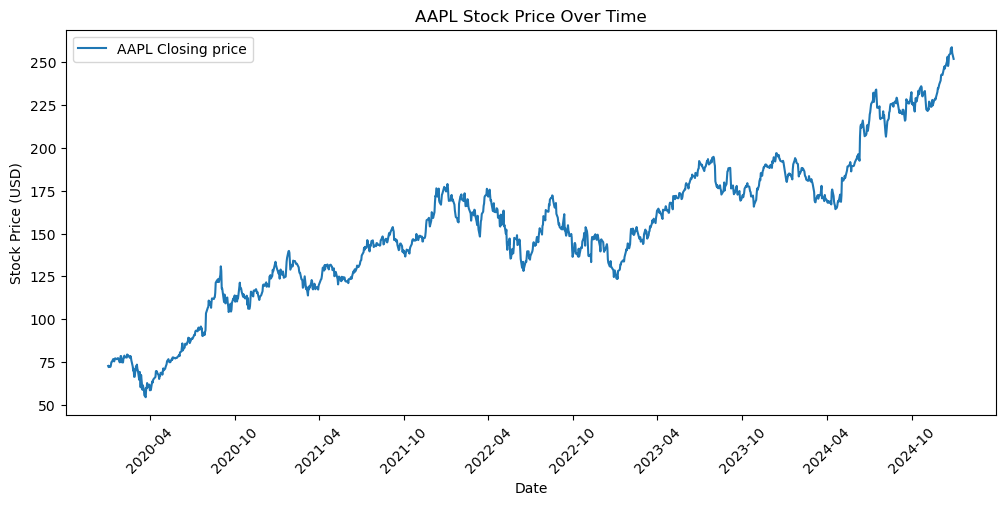

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data["Date"], data["Close"],linestyle="-",label="AAPL Closing price")
plt.title(f"AAPL Stock Price Over Time")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

In [13]:
data["50_MA"] = data["Close"].rolling(window=50).mean()
data["200_MA"] = data["Close"].rolling(window=200).mean()

In [14]:
data

Price,Date,Close,High,Low,Open,Volume,50_MA,200_MA
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN
1,2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800,NaN,NaN
2,2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN
3,2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,NaN,NaN
4,2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200,NaN,NaN
...,...,...,...,...,...,...,...,...
1252,2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,235.021528,210.752678
1253,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,235.564016,211.182569
1254,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,236.071997,211.614168


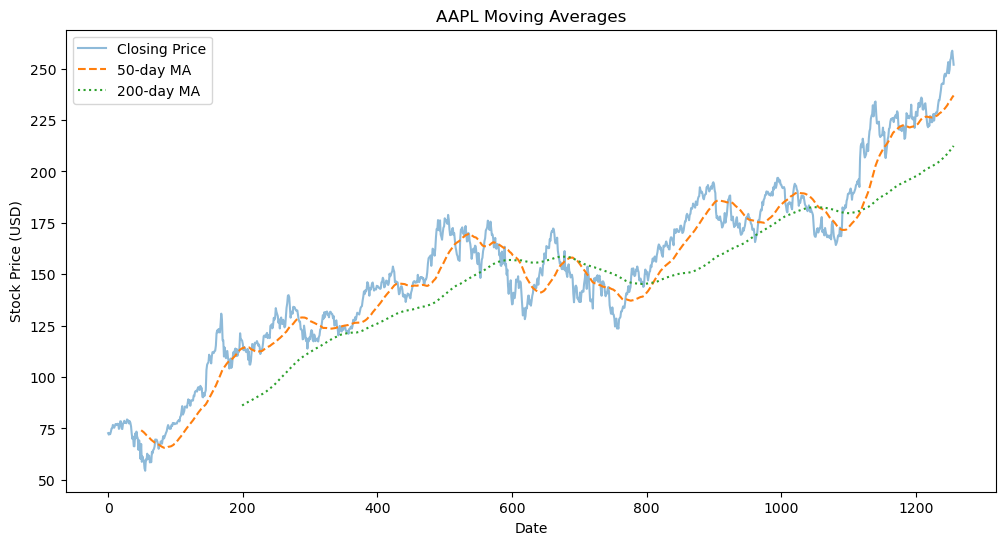

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Closing Price", alpha=0.5)
plt.plot(data["50_MA"], label="50-day MA", linestyle="dashed")
plt.plot(data["200_MA"], label="200-day MA", linestyle="dotted")
plt.title(f"AAPL Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()
#Where the 50-day MA crosses above the 200-day MA, it’s a bullish signal; below, it’s a bearish signal.


In [16]:
def calculate_rsi(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [17]:
data["RSI"] = calculate_rsi(data)

In [18]:
data

Price,Date,Close,High,Low,Open,Volume,50_MA,200_MA,RSI
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,NaN
1,2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800,NaN,NaN,NaN
2,2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,NaN
3,2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,NaN,NaN,NaN
4,2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1252,2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,235.021528,210.752678,73.865382
1253,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,235.564016,211.182569,76.180657
1254,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,236.071997,211.614168,76.812079


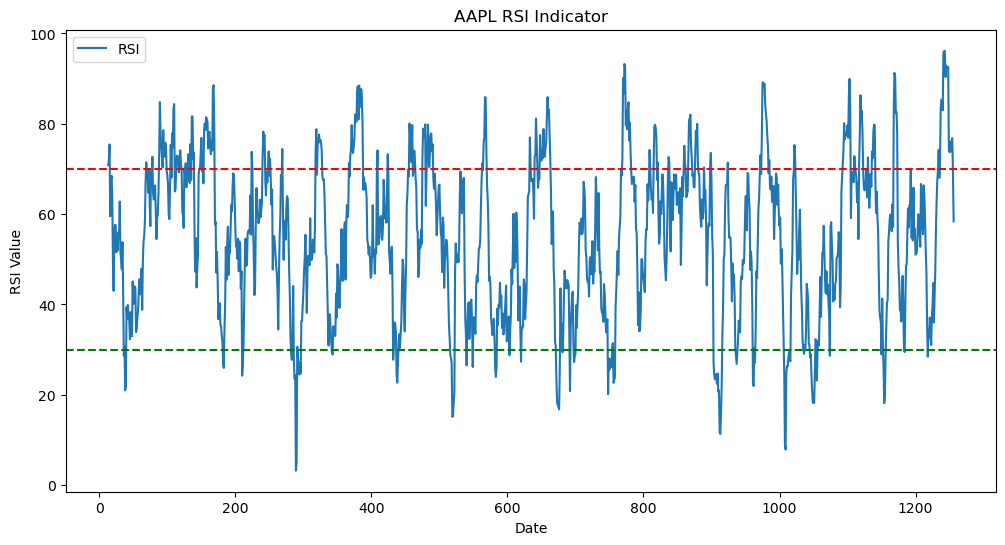

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data["RSI"], label="RSI")
plt.axhline(70, linestyle="--", color="red")  # Overbought line(where price may fall)
plt.axhline(30, linestyle="--", color="green")  # Oversold line(where price may rise)
plt.title(f"AAPL RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
data["Scaled_Close"] = scaler.fit_transform(data[["Close"]])

In [45]:
data

Price,Date,Close,High,Low,Open,Volume,50_MA,200_MA,RSI,Scaled_Close
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
0,2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,NaN,0.089415
1,2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800,NaN,NaN,NaN,0.085954
2,2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,NaN,0.088763
3,2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,NaN,NaN,NaN,0.087092
4,2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200,NaN,NaN,NaN,0.092781
...,...,...,...,...,...,...,...,...,...,...
1252,2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,235.021528,210.752678,73.865382,0.981664
1253,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,235.564016,211.182569,76.180657,0.995991
1254,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,236.071997,211.614168,76.812079,1.000000


In [47]:
def create_sequences(data, seq_length=50):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

In [53]:
X, y = create_sequences(data["Scaled_Close"].values, seq_length=50)

In [55]:
X_train, X_test = X[:-50], X[-50:]
y_train, y_test = y[:-50], y[-50:]

In [67]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(50, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mse", optimizer="adam")
history=model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0347
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 9.2138e-04
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 9.2161e-04
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 9.2085e-04
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 9.4235e-04
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.4088e-04
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 6.9429e-04
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 5.8000e-04
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 7.8739e-04
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 6.4808e-04
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 6.5665e-04
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 5.0410e-04
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 5.4902e-04
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 5.5394e-04
Epoch 15/20
73/73 

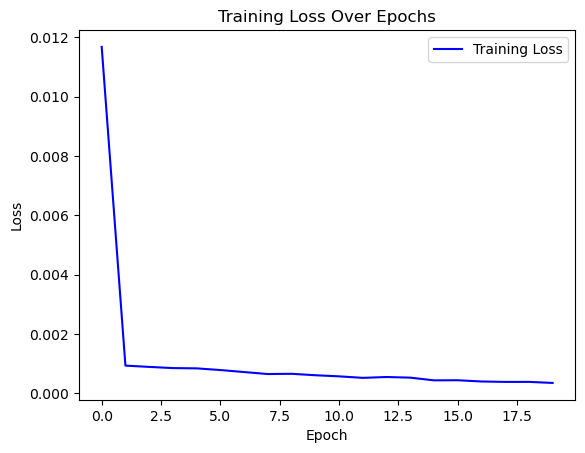

In [69]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [71]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


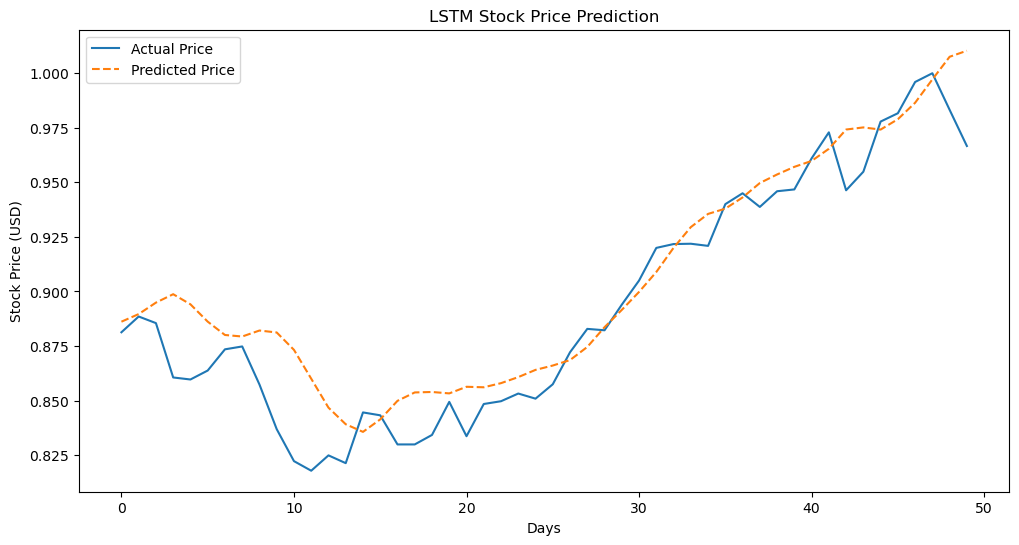

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Price")
plt.plot(y_pred, label="Predicted Price", linestyle="dashed")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [81]:
mae

0.014039335761302603

In [83]:
mse

0.000362825715848734

In [85]:
rmse

0.019047984561331784

In [151]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)